<a href="https://colab.research.google.com/github/hananlu/rockpaperscissors/blob/main/submissionUpdate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Mengimport library yang dibutuhkan 

import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf

In [ ]:
# Mendownload dataset yang ingin digunakan melalui website kemudian disimpan ke folder tmp yang ada di drive
!wget --no-check-certificate \
https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip\
  -O /tmp/rockpaperscissors.zip

--2021-06-27 14:57:05--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  2.76MB/s    in 1m 43s  

2021-06-27 14:58:48 (3.00 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [ ]:
#Melakukan Ekstrasi dataset yang telah didownload

import zipfile, os

local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()


In [ ]:
# Menampilkan daftar folder setelah di ekstrasi

os.listdir('/tmp/rockpaperscissors/rps-cv-images')

['README_rpc-cv-images.txt', 'scissors', 'paper', 'rock']

In [ ]:
# Menghapus file yang tidak dipakai 
os.remove('/tmp/rockpaperscissors/rps-cv-images/README_rpc-cv-images.txt')

In [ ]:
os.listdir('/tmp/rockpaperscissors/rps-cv-images')

['scissors', 'paper', 'rock']

In [ ]:
# membuat sebuah objek ImageDataGenerator untuk data training dan data testing.
# Image data generator adalah sebuah fungsi yang sangat berguna untuk mempersiapkan data latih dan data testing yang akan diberikan ke model.

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                   horizontal_flip=True,
                                   shear_range=0.2,
                                   fill_mode='nearest',
                                   validation_split=0.4)
test_datagen = ImageDataGenerator(rescale=1./255,
                                  rotation_range=20,
                                  horizontal_flip=True,
                                  shear_range=0.2,
                                  fill_mode='nearest',
                                  validation_split=0.4)

In [ ]:
# Menggunakan objek image data generator sebelumnya untuk mempersiapkan data latih yang akan dipelajari oleh model.

train_generator = train_datagen.flow_from_directory(directory='/tmp/rockpaperscissors/rps-cv-images',
                                                    batch_size=32, 
                                                    target_size=(150,150),      # mengubah resolusi seluruh gambar menjadi 150x150 piksel
                                                    class_mode='categorical',
                                                    subset='training',
                                                    shuffle=True)
validation_generator = test_datagen.flow_from_directory(directory='/tmp/rockpaperscissors/rps-cv-images',
                                                  batch_size=32,
                                                  target_size=(150, 150),
                                                  class_mode='categorical',
                                                  subset='validation',
                                                  shuffle=True)

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [48]:
#Membangun arsitektur CNN 

# Terdapatnya 2 lapis layer konvolusi dan max pooling
# layer konvolusi, mengekstraksi atribut pada gambar
# max pooling, mereduksi resolusi gambar

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [ ]:
# melatih model dengan model.fit dengan melakukan iterasi terhadap model yang dibuat

history = model.fit(
          train_generator,
          steps_per_epoch=25,
          epochs=10,
          validation_data = validation_generator,
          validation_steps=5,
          verbose=2)

Epoch 1/10
25/25 - 41s - loss: 0.2082 - accuracy: 0.9351 - val_loss: 0.2597 - val_accuracy: 0.9125
Epoch 2/10
25/25 - 42s - loss: 0.1581 - accuracy: 0.9550 - val_loss: 0.0963 - val_accuracy: 0.9812
Epoch 3/10
25/25 - 42s - loss: 0.1521 - accuracy: 0.9625 - val_loss: 0.0567 - val_accuracy: 0.9812
Epoch 4/10
25/25 - 41s - loss: 0.1399 - accuracy: 0.9558 - val_loss: 0.1404 - val_accuracy: 0.9625
Epoch 5/10
25/25 - 41s - loss: 0.0831 - accuracy: 0.9753 - val_loss: 0.0600 - val_accuracy: 0.9812
Epoch 6/10
25/25 - 41s - loss: 0.0784 - accuracy: 0.9766 - val_loss: 0.0211 - val_accuracy: 1.0000
Epoch 7/10
25/25 - 44s - loss: 0.1088 - accuracy: 0.9638 - val_loss: 0.1199 - val_accuracy: 0.9688
Epoch 8/10
25/25 - 41s - loss: 0.1032 - accuracy: 0.9727 - val_loss: 0.0490 - val_accuracy: 0.9875
Epoch 9/10
25/25 - 43s - loss: 0.0644 - accuracy: 0.9812 - val_loss: 0.0848 - val_accuracy: 0.9812
Epoch 10/10
25/25 - 41s - loss: 0.0705 - accuracy: 0.9805 - val_loss: 0.0329 - val_accuracy: 0.9875


In [ ]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


<function matplotlib.pyplot.show>

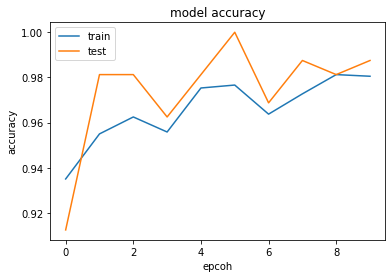

In [ ]:
# Membuat visualisasi accuracy model yang dibuat

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epcoh')
plt.legend(['train', 'test'], loc='upper left')
plt.show

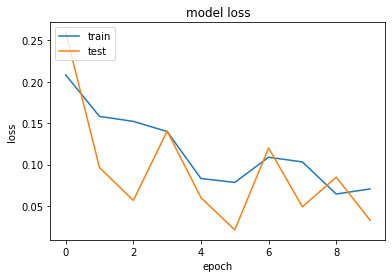

In [ ]:
# Membuat visualiasai loss model yang dibuat

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Saving batu3.jpg to batu3.jpg
batu3.jpg
rock


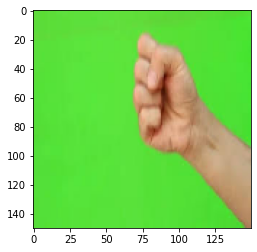

In [47]:

# Perintah yang digunakan untuk secara interaktif memilih sebuah berkas gambar, kemudian melakukan resize gambar dan mengubahnya menjadi larik numpy.
uploaded = files.upload()

for fn in uploaded.keys():

  path = fn
  img = image.load_img(path, target_size=(150, 150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  output_class = np.argmax(classes)

  
print(fn)
if output_class==0:
    print('paper')
elif output_class==1:
    print('rock')
else:
    print('scissors')